## Context
The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

## Content
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

### Stores
Anonymized information about the 45 stores, indicating the type and size of store

### Features
Contains additional data related to the store, department, and regional activity for the given dates.

Store - the store number
Date - the week
Temperature - average temperature in the region
Fuel_Price - cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week

## Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

Store - the store number
Dept - the department number
Date - the week
Weekly_Sales -  sales for the given department in the given store
IsHoliday - whether the week is a special holiday week


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

### Data from [Kaggle](https://www.kaggle.com/manjeetsingh/retaildataset)

In [7]:
feature = pd.read_csv('../ML-projects/retails/Features.csv',parse_dates = ['Date'],index_col = 'Date')
store = pd.read_csv('../ML-projects/retails/stores.csv')
sale = pd.read_csv('../ML-projects/retails/sales.csv',parse_dates = ['Date'],index_col = 'Date')

In [8]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-05-02 to 2013-07-26
Data columns (total 11 columns):
Store           8190 non-null int64
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1)
memory usage: 711.8 KB


In [9]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [10]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-05-02 to 2012-10-26
Data columns (total 4 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [12]:
sale.head(10)

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-05-02,1,1,24924.50,False
2010-12-02,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-05-03,1,1,21827.90,False
2010-12-03,1,1,21043.39,False
2010-03-19,1,1,22136.64,False
2010-03-26,1,1,26229.21,False
2010-02-04,1,1,57258.43,False


In [11]:
feature.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-05-02,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-12-02,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-05-03,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
top_sale = sale.groupby(['Store']).mean()['Weekly_Sales'].max()
print("Top avarage sale is {}".format(round(top_sale)))

Top avarage sale is 29508.0


In [38]:
poor_sale = sale.groupby(['Store']).mean()['Weekly_Sales'].min()
print("Poor avarage sale is {}".format((poor_sale)))

Poor avarage sale is 5053.415812868114


In [39]:
poor_store_sale = sale.groupby(['Store']).mean()['Weekly_Sales'][sale.groupby(['Store']).mean()['Weekly_Sales'] == 5053.415812868114]
print("poor store's avarage sale is {}".format(poor_store_sale.index[0]))

poor store's avarage sale is 5


In [15]:
top_store_sale = sale.groupby(['Store']).mean()['Weekly_Sales'][sale.groupby(['Store']).mean()['Weekly_Sales'] == 29508.301591932617]
print("Top store's avarage sale is {}".format(top_store_sale.index[0]))

Top store's avarage sale is 20


In [16]:
# avg_sale = pd.DataFrame(sale.groupby(['Store']).mean()['Weekly_Sales'])
avg_sale = pd.DataFrame(sale.groupby(['Store']).mean()['Weekly_Sales'])
# sale.groupby(['Store']).mean()['Weekly_Sales']
avg_sale.reset_index(inplace = True)

In [19]:
store_avg_sale = pd.merge(left = avg_sale,right = store,on = 'Store')

In [20]:
store_avg_sale.head(3)

,Store,Weekly_Sales,Type,Size
0,1,21710.543621,A,151315
1,2,26898.070031,A,202307
2,3,6373.033983,B,37392


Text(0, 0.5, 'Average Sales')

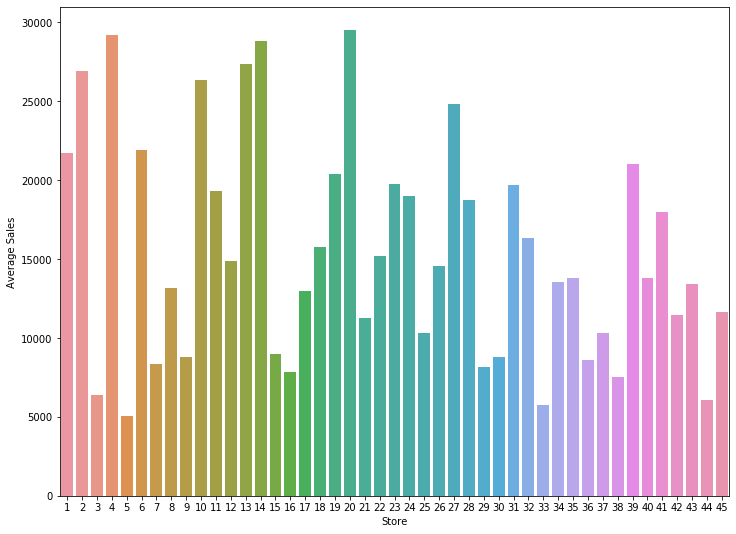

In [94]:
plt.subplots(figsize = (12,9))
sns.barplot(x = store_avg_sale['Store'].unique(),y = store_avg_sale['Weekly_Sales'])
plt.xlabel('Store')
plt.ylabel('Average Sales')
# sale['Store'].unique()

In [23]:
type_sale = store_avg_sale.groupby('Type').mean()['Weekly_Sales']

In [24]:
type_sale

Type
A    19626.236877
B    12087.378865
C     9575.247543
Name: Weekly_Sales, dtype: float64

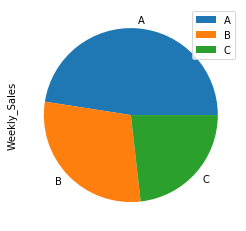

In [25]:
type_sale.plot(kind = 'pie')
plt.legend(type_sale.index)

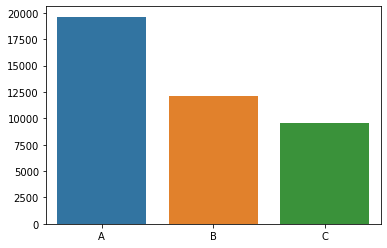

In [26]:
sns.barplot(x = ['A','B','C'],y = type_sale.values)

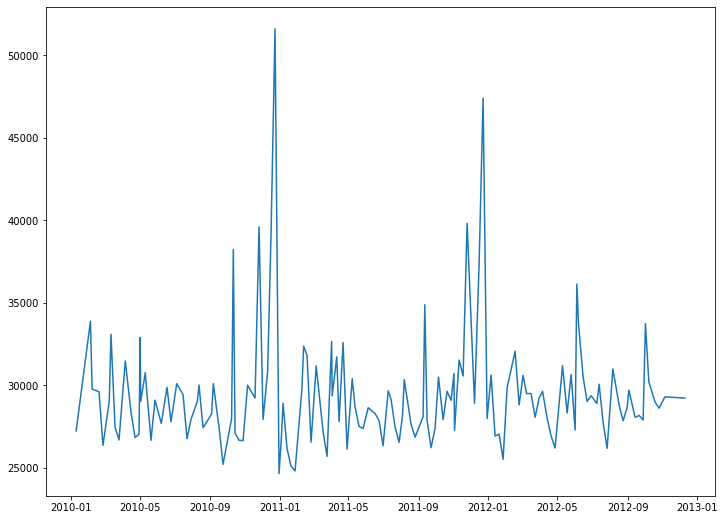

In [64]:
store20 = sale[sale['Store'] == 20].groupby('Date').mean()
plt.subplots(figsize = (12,9))
plt.plot(store20['Weekly_Sales'])

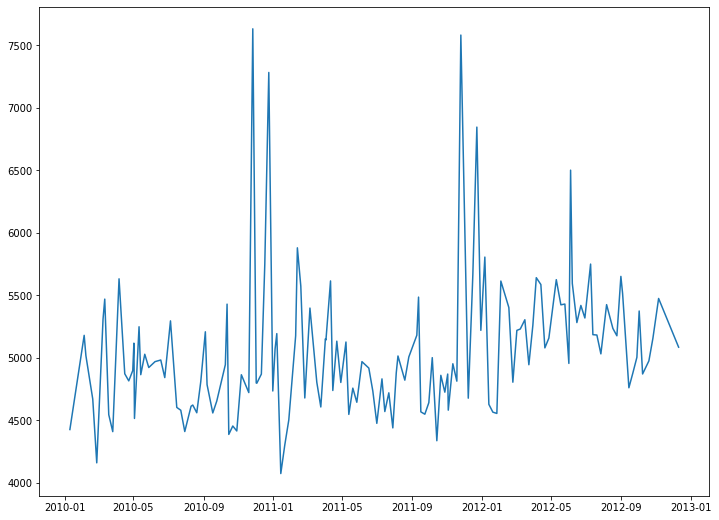

In [63]:
store5 = sale[sale['Store'] == 5].groupby('Date').mean()
plt.subplots(figsize = (12,9))
plt.plot(store5['Weekly_Sales'])

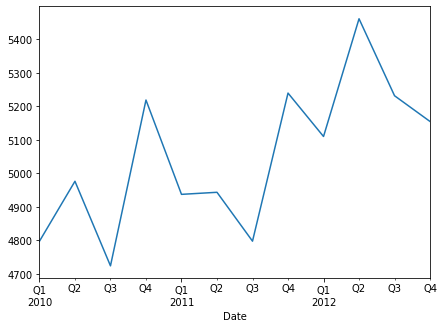

In [112]:
plt.figure(figsize = (7,5))
store5['Weekly_Sales'].resample('Q').mean().plot()

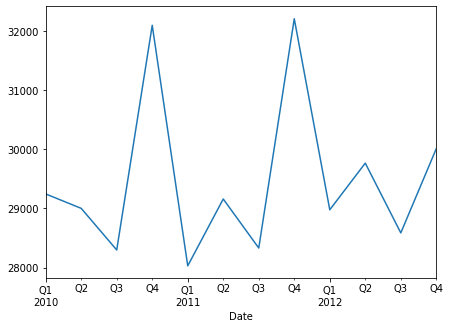

In [110]:
plt.figure(figsize = (7,5))
store20['Weekly_Sales'].resample('Q').mean().plot()

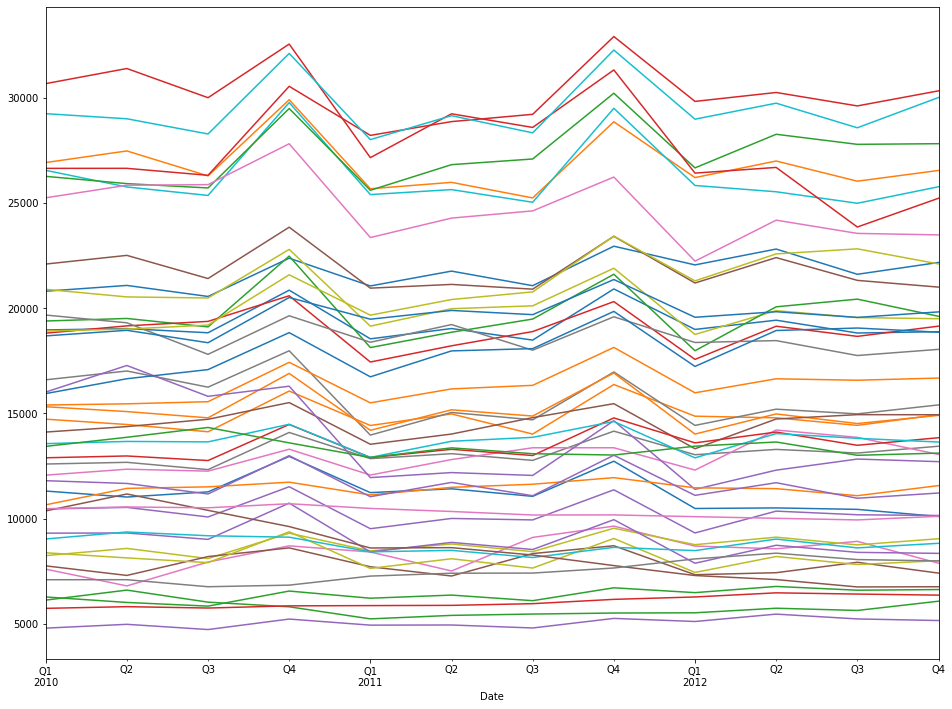

In [123]:
plt.figure(figsize = (16,12))
for store in sale['Store'].unique():
    sale[sale['Store'] == store].resample('Q').mean()['Weekly_Sales'].plot()